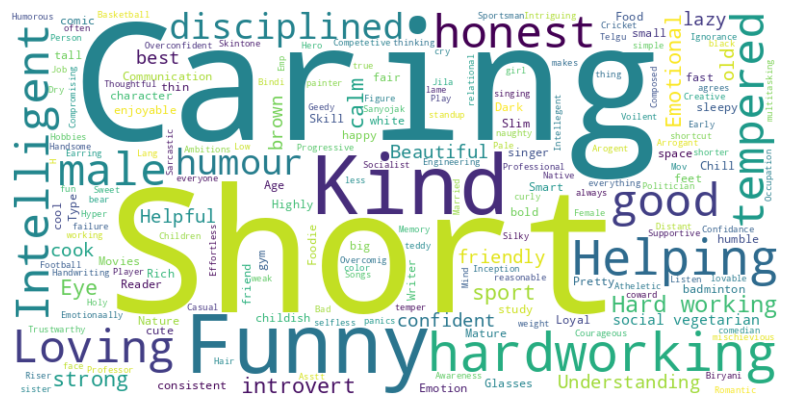

In [24]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the Excel file. The result of read_excel is stored in 'df'
df = pd.read_excel("Person_Data.xlsx", sheet_name="Sheet1")

text_data = df.iloc[:, 2:].astype(str).fillna("").values.flatten()
text_corpus = " ".join(text_data)

remove_words = set([
    'nan', 'Hair', 'Eye', 'Feet', 'kg', 'eye', 'Height', 'hair', 'Age',
    'Skintone', 'Cm', 'Color', 'years', 'AP', 'color', 'Years', 'Kg',
    'Skin', 'height', 'cricket', 'Self', 'Govt', 'non', 'Brown', 'Black',
    'Upma', 'Fav', 'Computer', 'Glasses', 'Yellow', 'Marks', 'True',
    'new', 'Movies', 'Skintone', 'mind','Song','Language','Likes','Job','Vijaywada',
    'skin','Keyboard'
])
text_cleaned = " ".join(word for word in text_corpus.split() if word not in remove_words)
text_cleaned = text_cleaned.replace("Color", "")

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_cleaned)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import pandas as pd
import re
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download necessary NLP resources


df = pd.read_excel("Person_Data.xlsx", sheet_name="Sheet1")

# Combine all attribute columns into a single text corpus
text_data = df.iloc[:, 2:].astype(str).values.flatten()
text_corpus = " ".join(text_data)

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return words

# Tokenize the text data
tokenized_text = [preprocess_text(text_corpus)]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Example: Get the vector for a specific word
word = "funny"
if word in model.wv:
    print(f"Word Embedding for '{word}':\n", model.wv[word])
else:
    print(f"'{word}' not in vocabulary.")

Word Embedding for 'funny':
 [-1.35412747e-02  1.34696485e-02  5.80059132e-03  1.54062361e-02
  4.15413873e-03 -9.77190025e-03  1.44205149e-02  1.15330480e-02
 -1.39973098e-02  2.27990351e-03  7.01297307e-03 -1.51008954e-02
  6.75419951e-03  2.13081785e-03  9.29751247e-03 -5.16930036e-03
 -4.11134120e-03 -6.18518470e-03 -1.49353808e-02 -2.05062348e-02
  7.93468114e-03  1.04032177e-02  1.62800662e-02 -9.89919715e-03
  3.83141125e-03  1.12242869e-03 -5.43676177e-03 -1.15296058e-02
 -8.72911979e-03 -1.13410782e-02  9.26283188e-03 -4.64141415e-03
  1.26346340e-02  1.85411295e-03 -7.00963102e-03  1.20512489e-02
  3.77075025e-03 -4.08245505e-05 -8.87390343e-04 -2.24144906e-02
 -6.86466601e-03  2.43294242e-04 -6.68100221e-03 -3.94213479e-03
  6.07200572e-03 -3.58241796e-03 -4.94506722e-03  3.80493631e-03
  2.01061764e-03  2.88210716e-03  2.42949766e-03  1.38200819e-03
 -7.86697783e-04 -4.13587410e-03  4.56904247e-03 -2.41229404e-03
  5.06435754e-03  2.30270103e-04 -4.38500009e-03 -8.58711312e

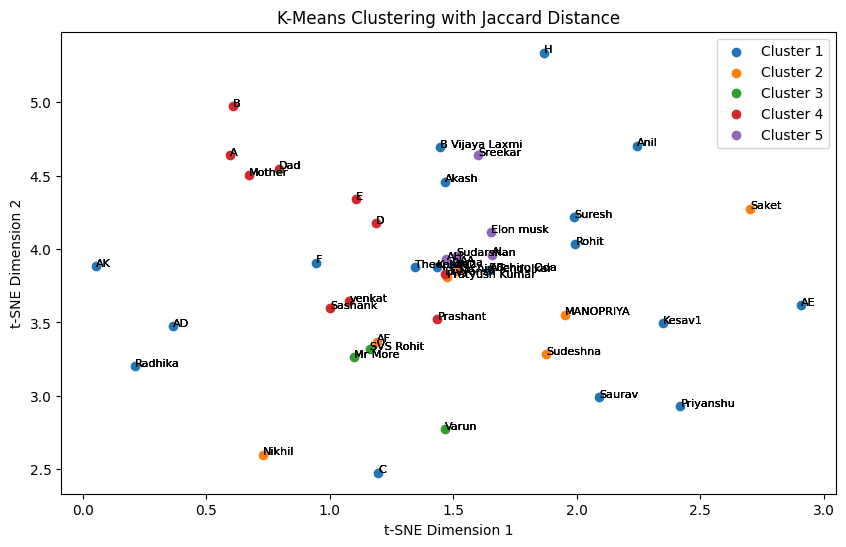

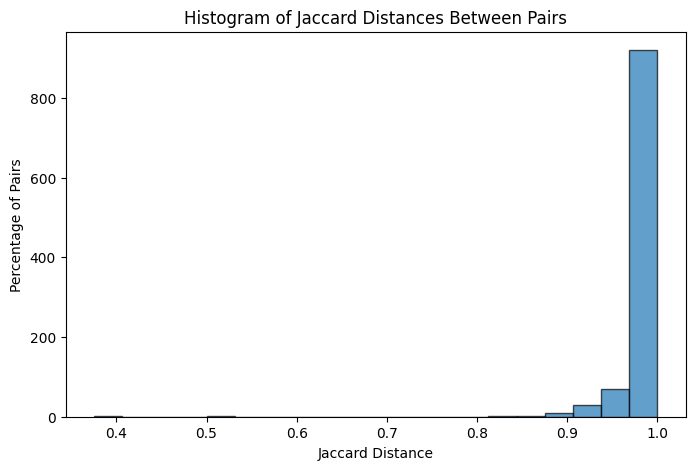

Cluster 1: ['AA', 'AB', 'AD', 'AE', 'AK', 'Akash', 'Anil', 'B Vijaya Laxmi', 'C', 'Euchiro Oda', 'F', 'H', 'Kesav1', 'Kesav2', 'Priyanshu', 'Purna', 'Radhika', 'Rohit', 'Saurav', 'Suresh', 'Theophila']
Cluster 2: ['AF', 'MANOPRIYA', 'Nikhil', 'Pratyush Kumar', 'Sachin Tendulkar', 'Saket', 'Sudeshna']
Cluster 3: ['Mr More', 'SVS Rohit', 'Varun']
Cluster 4: ['A', 'B', 'D ', 'Dad', 'Divyansh', 'E', 'Mother', 'Prashant', 'Sashank', 'venkat']
Cluster 5: ['AH', 'AL', 'Elon musk', 'Sreekar', 'Sudarshan']


In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.metrics import jaccard_score
from itertools import combinations

def jaccard_distance(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return 1 - (intersection / union) if union != 0 else 1

df = pd.read_excel("Person_Data.xlsx", sheet_name="Sheet1")

# Convert data into a dictionary format {Person: Set of Attributes}
df_cleaned = df.drop(columns=["Sno"]).set_index("Person").stack().reset_index(drop=True, level=1)
df_cleaned = df_cleaned.groupby("Person").apply(set)

# Convert dictionary to list format for easier indexing
persons = list(df_cleaned.keys())
attribute_sets = [set(attrs) for attrs in df_cleaned]

all_attributes = set().union(*attribute_sets)
attribute_list = list(all_attributes)

vectorized_data = np.array([
    [1 if attr in attr_set else 0 for attr in attribute_list]
    for attr_set in attribute_sets
])

def kmeans_jaccard(attribute_sets, k=3, max_iters=100):
    centers = random.sample(attribute_sets, k)
    clusters = [[] for _ in range(k)]
    prev_centers = [set() for _ in range(k)]

    iteration = 0
    while centers != prev_centers and iteration < max_iters:
        clusters = [[] for _ in range(k)]
        for i, attr_set in enumerate(attribute_sets):
            distances = [jaccard_distance(attr_set, center) for center in centers]
            closest_center = np.argmin(distances)
            clusters[closest_center].append(i)

        prev_centers = centers.copy()
        for i in range(k):
            if clusters[i]:
                new_center = set()
                for idx in clusters[i]:
                    new_center.update(attribute_sets[idx])
                centers[i] = new_center

        iteration += 1

    return clusters, centers

k = 5
clusters, centers = kmeans_jaccard(attribute_sets, k)

labels = np.zeros(len(attribute_sets))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

tsne = TSNE(n_components=2, random_state=42)
embedded_data = tsne.fit_transform(vectorized_data)

plt.figure(figsize=(10, 6))
for cluster_idx in range(k):
    cluster_points = embedded_data[labels == cluster_idx]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_idx+1}")
    for i, person in enumerate(persons):
        plt.annotate(person, (embedded_data[i, 0], embedded_data[i, 1]), fontsize=8, alpha=0.75)

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("K-Means Clustering")
plt.legend()
plt.show()


jaccard_distances = [jaccard_distance(attribute_sets[i], attribute_sets[j])
                     for i, j in combinations(range(len(attribute_sets)), 2)]

plt.figure(figsize=(8, 5))
plt.hist(jaccard_distances, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel("Jaccard Distance")
plt.ylabel("Percentage of Pairs")
plt.title("Histogram of Jaccard Distances Between Pairs")
plt.show()

# Print results
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}: {[persons[idx] for idx in cluster]}")